<a href="https://colab.research.google.com/github/Saifullah785/Machine_Learning_Projects/blob/main/Project_09_Resume_Screening_with_Python/Project_09_Resume_Screening_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Dataset**

In [96]:
# Load the dataset from the specified CSV file into a pandas DataFrame.
df = pd.read_csv('/content/UpdatedResumeDataSet.csv')

In [97]:
# Display the first 5 rows of the DataFrame to get a glimpse of the data structure and content.
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [98]:
# Print the dimensions of the DataFrame (number of rows and columns).
df.shape

(962, 2)

# **Exploring Categories**

In [99]:
# Count the occurrences of each unique value in the 'Category' column.
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


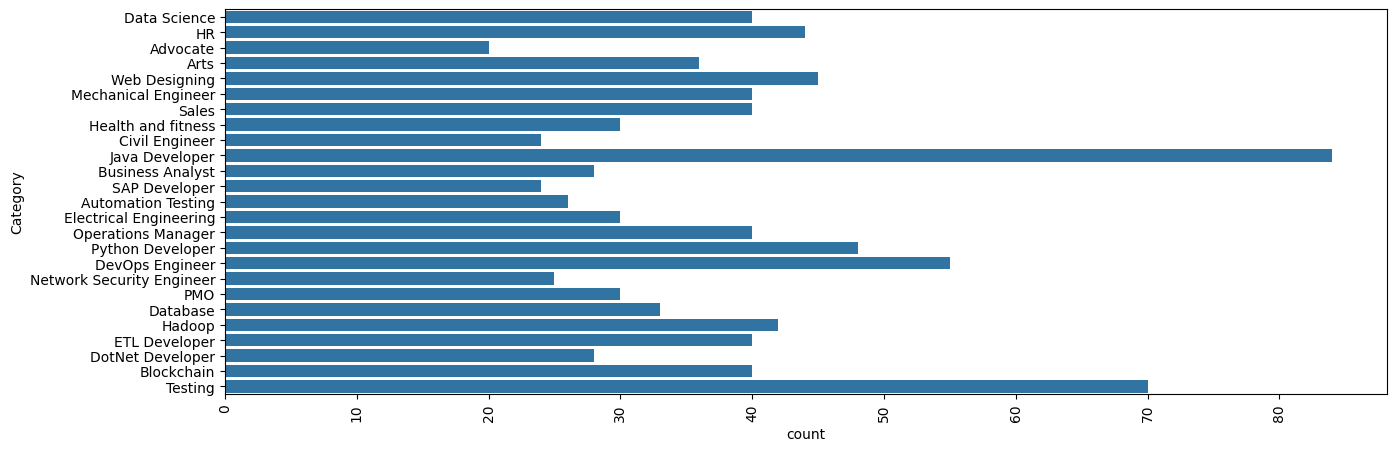

In [100]:
# Create a figure with a specified size for better visualization.
plt.figure(figsize=(15, 5))
# Generate a countplot of the 'Category' column to visualize the distribution of categories.
sns.countplot(df['Category'])
# Rotate the x-axis labels by 90 degrees for better readability, especially if there are many categories.
plt.xticks(rotation=90)
# Display the plot.
plt.show()

In [101]:
# Get all the unique values from the 'Category' column.
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

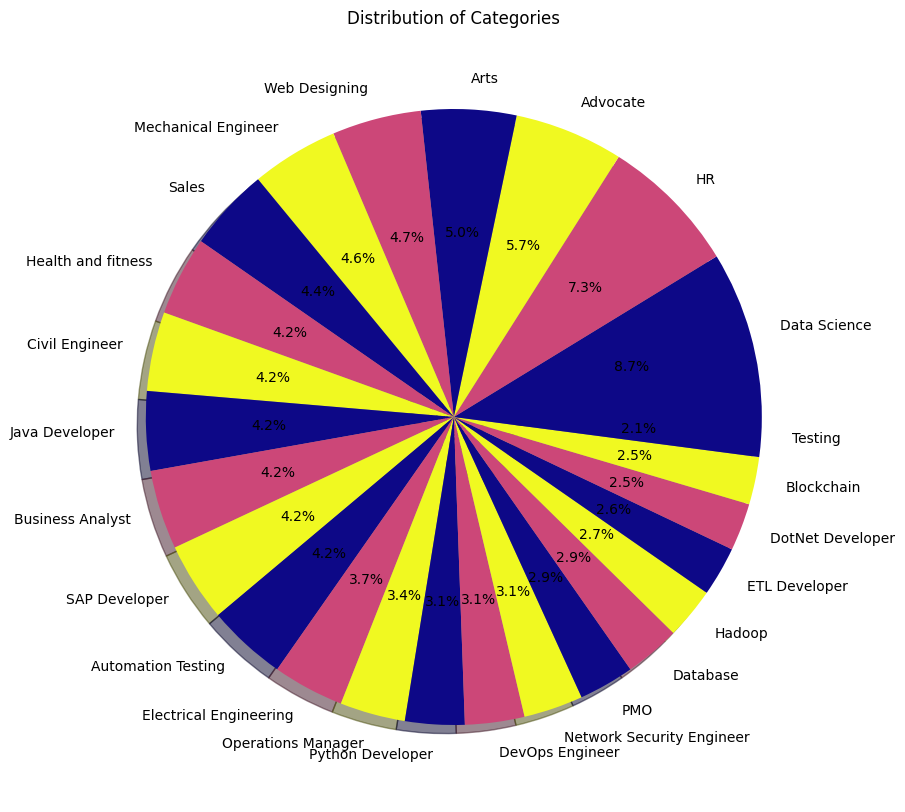

In [102]:
# Get the counts of each unique value in the 'Category' column.
counts = df['Category'].value_counts()

# Get the unique labels from the 'Category' column.
labels = df['Category'].unique()

# Create a figure with a specified size for the pie chart.
plt.figure(figsize=(15, 10))
# Create a pie chart using the counts and labels.
# autopct displays the percentage of each wedge.
# shadow adds a shadow to the pie chart for better visual effect.
# colors uses a plasma colormap to color the wedges.
plt.pie(counts, labels=labels, autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
# Set the title of the pie chart.
plt.title('Distribution of Categories')
# Display the plot.
plt.show()

# **Exploring Resume**

In [103]:
# Display the value of the 'Category' column for the first row (index 0).
df['Category'][0]

'Data Science'

In [104]:
# Display the value of the 'Resume' column for the first row (index 0).
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# **Balance Classes (Categories)**

In [105]:
# check the original category distribution

print('Original Category Distribution')
# Print the original distribution of categories before oversampling.
print(df['Category'].value_counts())

# Get the largest category size (i.e., the category with the maximum number of entries)
max_size = df['Category'].value_counts().max()

Original Category Distribution
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64


In [106]:
# perform oversampling

# Group the DataFrame by 'Category' and sample each category with replacement to match the size of the largest category.
balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace =True)).reset_index(drop=True)

# Shuffle the dataset to avoid any order bias
# sample(frac=1) shuffles the entire DataFrame.
# reset_index(drop=True) resets the index after shuffling.
df = balanced_df.sample(frac=1).reset_index(drop=True)

# check the balanced category distribution
print('\nBalanced Category Distribution (After Oversampling):')
# Print the category distribution after oversampling to confirm balancing.
print(df['Category'].value_counts())


Balanced Category Distribution (After Oversampling):
Category
Database                     84
Java Developer               84
Operations Manager           84
Business Analyst             84
Python Developer             84
Network Security Engineer    84
SAP Developer                84
Arts                         84
Sales                        84
Hadoop                       84
Testing                      84
Electrical Engineering       84
DevOps Engineer              84
Automation Testing           84
Advocate                     84
PMO                          84
HR                           84
Blockchain                   84
Web Designing                84
Health and fitness           84
ETL Developer                84
Civil Engineer               84
Mechanical Engineer          84
Data Science                 84
DotNet Developer             84
Name: count, dtype: int64


# **Cleaning Data:**

1.URLs,

2.hastags,

3.mentions,

4.special letters,

5.punctuations:


In [107]:
import re

# Define a function to clean the resume text.
def cleanResume(txt):

    # Remove URLs
    cleanText = re.sub('http\S+\s', ' ', txt)

    # Remove RT and cc
    cleanText = re.sub('RT|cc', ' ', cleanText)

    # Remove hashtags
    cleanText = re.sub('#\S+\s', ' ', cleanText)

    # Remove mentions
    cleanText = re.sub('@\S+', '  ', cleanText)

    # Remove special letters and punctuations
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)

    # Remove non-ASCII characters
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)

    # Replace multiple spaces with a single space
    cleanText = re.sub('\s+', ' ', cleanText)

    return cleanText

In [108]:
# Test the cleanResume function with a sample string.
cleanResume("my #### $ #  #noorsaeed webiste like is this http://heloword and access it @gmain.com")

'my webiste like is this and a ess it '

In [109]:
# Apply the cleanResume function to the 'Resume' column of the DataFrame.
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [110]:
# Display the cleaned text of the first resume entry.
df['Resume'][0]

'TECHNICAL SKILL Operating System LINUX Windows Server 2012 R2 Windows 98 Windows 2000 XP Tools Utility Packages SQL Loader SQL PLUS OEM Datapump expdp impdp PLSQL Developer Jenkins Database Oracle 10g Oracle 11g Oracle 12c Scripting UNIX Shell Scripting Language SQL Education Details January 2011 M B A Amravati Maharashtra Amravati University January 2007 B C A Nagpur Maharashtra Nagpur University Oracle Database Administrator ORACLE DATABASE ADMINISTRATOR ON LINUX MICROSOFT WITH 4 YEARS EXPERIENCE Skill Details ORACLE Exprience 48 months LINUX Exprience 6 months ORACLE DBA Exprience Less than 1 year months RAC Exprience Less than 1 year months GOLDEN GATE Exprience Less than 1 year months ASM Exprience Less than 1 year months DATAGUARD Exprience Less than 1 year monthsCompany Details company TIETO INDIA PVT LTD description Pune From February 2015 till present Project Profile Oil and Gas unit of Tieto India Pvt Ltd is working for Environmental Components EC application Tieto is the au

# **Words into categorical values**

In [111]:
from sklearn.preprocessing import LabelEncoder
# Initialize a LabelEncoder object.
le = LabelEncoder()

In [112]:
# Fit the LabelEncoder to the 'Category' column to learn the unique categories.
le.fit(df['Category'])

# Transform the 'Category' column into numerical labels.
df['Category'] = le.transform(df['Category'])

In [113]:
# Display the unique numerical labels in the 'Category' column.
df.Category.unique()

array([ 7, 15, 18,  4, 20, 17, 21,  1, 22, 13, 23, 11,  8,  2,  0, 19, 12,
        3, 24, 14, 10,  5, 16,  6,  9])

# ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       dtype=object)

# **Vactorization**

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer with 'english' stop words.
tfidf = TfidfVectorizer(stop_words='english')
# Fit the TfidfVectorizer to the 'Resume' column to learn the vocabulary and IDF values.
tfidf.fit(df['Resume'])

TfidfVectorizer(stop_words='english')

In [115]:
# Transform the 'Resume' column into TF-IDF vectors.
requiredText = tfidf.transform(df['Resume'])

# **Splitting**

In [116]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets.
# requiredText is the feature data, df['Category'] is the target variable.
# test_size=0.2 means 20% of the data will be used for testing.
# random_state=42 ensures reproducibility of the split.
x_train, x_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=42)

In [117]:
# Print the shape of the training feature set (number of samples, number of features).
x_train.shape

(1680, 7314)

In [118]:
# Print the shape of the testing feature set (number of samples, number of features).
x_test.shape

(420, 7314)

# **Now let's train the model and print the classification report:**

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [120]:
# Ensure that x_train and x_test are dense if they are sparse
# Some models require dense input, so convert if necessary.
x_train = x_train.toarray() if hasattr(x_train, 'toarray') else x_train

x_test = x_test.toarray() if hasattr(x_test, 'toarray') else x_test

In [121]:
#1. Train KNeighborsClassifier

# Initialize a KNeighborsClassifier and wrap it with OneVsRestClassifier for multi-class classification.
knn_model = OneVsRestClassifier(KNeighborsClassifier())

# Train the KNN model using the training data.
knn_model.fit(x_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [122]:
# Make predictions on the test set using the trained KNN model.
y_pred_knn = knn_model.predict(x_test)

# Print the evaluation results for the KNeighborsClassifier.
print("\nKNeighborsClassifier Results:")

# Print the accuracy score.
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")

# Print the confusion matrix.
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")

# Print the classification report (precision, recall, f1-score, support for each class).
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")


KNeighborsClassifier Results:
Accuracy: 1.0000
Confusion Matrix:
[[19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  

# 2. Train SVC



In [123]:
# Initialize an SVC model and wrap it with OneVsRestClassifier for multi-class classification.
svc_model = OneVsRestClassifier(SVC())

# Train the SVC model using the training data.
svc_model.fit(x_train, y_train)

OneVsRestClassifier(estimator=SVC())

In [124]:
# Make predictions on the test set using the trained SVC model.
y_pred_svc = svc_model.predict(x_test)
# Print the evaluation results for the SVC.
print("\nSVC Results:")
# Print the accuracy score.
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
# Print the confusion matrix.
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svc)}")
# Print the classification report.
print(f"Classification Report:\n{classification_report(y_test, y_pred_svc)}")


SVC Results:
Accuracy: 1.0000
Confusion Matrix:
[[19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0 

# **3. Train RandomForestClassifier**


In [125]:
# Initialize a RandomForestClassifier and wrap it with OneVsRestClassifier for multi-class classification.
rf_model = OneVsRestClassifier(RandomForestClassifier())

# Train the RandomForest model using the training data.
rf_model.fit(x_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [126]:
# Make predictions on the test set using the trained RandomForest model.
y_pred_rf = rf_model.predict(x_test)

# Print the evaluation results for the RandomForestClassifier.
print("\nRandomForestClassifier Results:")

# Print the accuracy score.
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

# Print the confusion matrix.
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")

# Print the classification report.
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")


RandomForestClassifier Results:
Accuracy: 1.0000
Confusion Matrix:
[[19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0

# **Save Files**

In [127]:
import pickle
# Save the trained TfidfVectorizer, the trained SVC model, and the LabelEncoder to pickle files.
# These files can be loaded later to make predictions without retraining.
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(svc_model, open('clf.pkl', 'wb'))
pickle.dump(le, open('encoder.pkl', 'wb'))

# **Prediction System**

In [128]:
# Function to predict the category of a resume
def pred (input_resume):

  # preprocess the input text (e.g., cleaning etc.)
  # Clean the input resume text using the cleanResume function.
  cleaned_text = cleanResume(input_resume)

  # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
  # Transform the cleaned text into a TF-IDF vector.
  vectorized_text = tfidf.transform([cleaned_text])

  # convert sparse matrix to dense
  # Convert the sparse TF-IDF matrix to a dense array, as required by the SVC model.
  vectorized_text = vectorized_text.toarray()

  # prediction
  # Make a prediction using the trained SVC model.
  predicted_category = svc_model.predict(vectorized_text)

  # get name of predicted category
  # Inverse transform the numerical prediction back to the original category name.
  predicted_category_name = le.inverse_transform(predicted_category)

  # Return the predicted category name.
  return predicted_category_name[0]

In [129]:
# Define a sample resume text for testing the prediction system.
myresume ="""I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEE
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration """

# Call the prediction function with the sample resume and print the predicted category.
pred(myresume)

'Data Science'

In [130]:
# Define another sample resume text, this one focused on Health and Fitness.
myresume = """
Jane Smith is a certified personal trainer with over 5 years of experience in helping individuals achieve their fitness goals. Specializing in weight loss, strength training, and sports conditioning, Jane has developed personalized workout routines for clients of all ages and fitness levels. She has extensive knowledge in nutrition and exercise science, and uses this to create holistic health and fitness programs that are tailored to individual needs.

Jane holds a degree in Exercise Science and is a certified trainer through the National Academy of Sports Medicine (NASM). She has worked with athletes, seniors, and individuals with chronic health conditions, helping them improve their physical well-being and overall quality of life.

Her expertise includes:
- Weight Loss and Body Composition
- Strength Training and Resistance Exercises
- Cardio Conditioning
- Nutrition Coaching and Meal Planning
- Injury Prevention and Rehabilitation
- Functional Movement and Flexibility Training
- Group Fitness Classes

Certifications:
- Certified Personal Trainer, NASM
- CPR and First Aid Certified
- Yoga Instructor (200-Hour Certification)

Education:
BSc in Exercise Science, ABC University, 2014-2018

Work Experience:
- Personal Trainer at XYZ Fitness Gym (2018-Present)
- Fitness Coach at Wellness Center (2016-2018)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""

# Now, test the model with the Health and Fitness-focused resume and print the predicted category.
pred(myresume)

'Health and fitness'

In [131]:
# Define a sample resume text for a Network Security Engineer.
myresume = """
John Doe is an experienced Network Security Engineer with over 7 years of expertise in designing, implementing, and managing network security infrastructures. Specializing in safeguarding critical network systems, John has worked with various organizations to protect against cyber threats, data breaches, and unauthorized access. He is proficient in deploying firewalls, intrusion detection systems (IDS), VPNs, and network monitoring tools to ensure the integrity and security of networks.

John holds a degree in Computer Science and certifications in several cybersecurity domains, including Certified Information Systems Security Professional (CISSP), Certified Ethical Hacker (CEH), and Cisco Certified Network Associate (CCNA). He has extensive experience in troubleshooting and resolving network vulnerabilities, and has played a key role in conducting security audits and risk assessments.

Key Skills:
- Network Security Architecture
- Firewall Management and Configuration
- Intrusion Detection and Prevention Systems (IDS/IPS)
- Virtual Private Networks (VPNs)
- Security Audits and Risk Assessments
- Cybersecurity Incident Response
- Network Monitoring and Traffic Analysis
- Vulnerability Assessment and Penetration Testing
- Data Encryption and Secure Communications

Certifications:
- CISSP (Certified Information Systems Security Professional)
- CEH (Certified Ethical Hacker)
- CCNA (Cisco Certified Network Associate)
- CompTIA Security+

Education:
BSc in Computer Science, XYZ University, 2012-2016

Professional Experience:
- Network Security Engineer at ABC Corp (2016-Present)
- IT Security Specialist at DEF Solutions (2014-2016)

Languages:
- English (Fluent)
- French (Intermediate)
"""

# Now, test the model with the Network Security Engineer-focused resume and print the predicted category.
pred(myresume)

'Network Security Engineer'

In [132]:
# Define a sample resume text for an Advocate.
myresume = """
Sarah Williams is a dedicated and skilled advocate with over 10 years of experience in providing legal representation to clients across various sectors, including criminal law, civil litigation, and family law. With a deep understanding of legal procedures and case law, Sarah has successfully handled numerous cases in the courtroom, negotiating favorable settlements and providing expert legal advice to individuals and businesses.

She holds a law degree from XYZ University and is a licensed attorney, practicing law in multiple jurisdictions. Sarah is passionate about ensuring justice is served and strives to make legal processes more accessible to her clients. She is known for her excellent research and analytical skills, attention to detail, and commitment to upholding the law with integrity.

Key Skills:
- Criminal Law
- Civil Litigation
- Family Law
- Contract Law
- Legal Research and Writing
- Courtroom Advocacy
- Legal Counseling and Advice
- Client Relationship Management
- Legal Compliance and Regulations
- Negotiation and Settlement

Certifications and Licenses:
- Licensed Attorney at Law, XYZ State Bar
- Certification in Criminal Law, XYZ University

Education:
JD in Law, XYZ University, 2010-2013

Professional Experience:
- Senior Advocate at ABC Law Firm (2016-Present)
- Associate Advocate at DEF Legal Group (2013-2016)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""

# Now, test the model with the Advocate-focused resume and print the predicted category.
pred(myresume)

'Advocate'